In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pixiedust
np.set_printoptions(suppress=True)
%matplotlib inline

Pixiedust database opened successfully


In [13]:
x = np.linspace(-5, 0).reshape(50,1)
t = np.array([np.sin(n) + 10 for n in x])
y = np.array([np.sin(n) + np.random.normal(10, 0.1) for n in x])

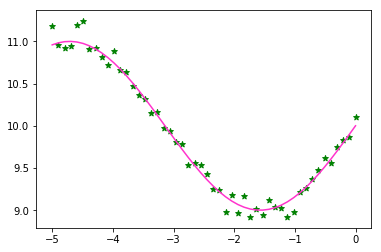

In [14]:
plt.scatter(x, y, color='green', marker='*');
plt.plot(x, t, color='#ff33cc');

In [25]:
def forward(x, W0, B0, W1, B1):
    S0 = (x @ W0) + B0
    A0 = np.maximum(0, S0)
    y_hat = (A0 @ W1) + B1
    return y_hat, S0, A0

In [26]:
def loss(y, y_hat):
    mse = ((y - y_hat) ** 2).mean()
    return mse

In [28]:
# number of neurons in hidden layer
_p = 20

# initialize layer 0
W0 = np.random.random((1,_p))
B0 = np.random.random((1,_p))
# initialize layer 1
W1 = np.random.random((_p,1))
B1 = np.random.random((1,1))

for _e in range(100):
    #  *** FORWARD PROPAGATION ***
    # nx1
    y_hat, S0, A0 = forward(x, W0, B0, W1, B1)
    _mse   = loss(y, y_hat)    

    #  *** BACKWARD PROPAGATION ***
    # nx1 = (nx1) * scalar
    b1_g = ((y - y_hat) * -1)
    # 1x1 = mean(nx1)
    b1_g = b1_g.mean().reshape(1,1)
    
    # nx2 = (nx1) * scalar * (nx2)
    w1_g = ((y - y_hat) * -1) * np.maximum(0, S0)
    # 2x1 = mean(nx2) of columns
    w1_g = w1_g.mean(axis=0).reshape(_p,1)

    # nx2 = (nx1) * scalar * (nx2) == (nx2) * (1x2)
    b0_g = ((y - y_hat) * -1) * np.maximum(0, S0).astype('bool') * W1.T
    # 1x2 = mean(nx2) of columns
    b0_g = b0_g.mean(axis=0).reshape(1,_p)
    
    # nx2 = (nx1) * scalar * (nx2) == (nx2) * (1x2) * (nx1)
    w0_g = ((y - y_hat) * -1) * np.maximum(0, S0).astype('bool') * W1.T * x
    # 1x2 = mean(nx2) of columns
    w0_g = w0_g.mean(axis=0).reshape(1,_p)
    
    #  *** UPDATE GRADIENTS ***
    lr = 0.01
    B1 -= lr * b1_g
    W1 -= lr * w1_g
    B0 -= lr * b0_g
    W0 -= lr * w0_g
    
    if _e % 10 == 0:
        print("mse: {:.2f}".format(_mse))

mse: 80.51
mse: 1.66
mse: 0.89
mse: 0.44
mse: 0.23
mse: 0.13
mse: 0.09
mse: 0.07
mse: 0.07
mse: 0.06


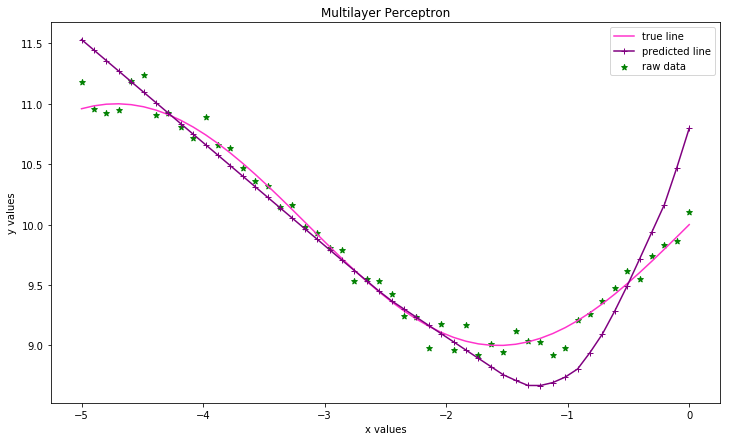

In [45]:
plt.figure(figsize=(12,7))
plt.scatter(x, y, color='green', marker='*', label='raw data');
plt.plot(x, t, color='#ff33cc', label='true line');
plt.plot(x, forward(x, W0, B0, W1, B1)[0], color='purple', marker='+', label='predicted line');
plt.title('Multilayer Perceptron');
plt.ylabel('y values');
plt.xlabel('x values');
plt.legend();